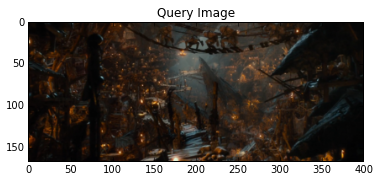

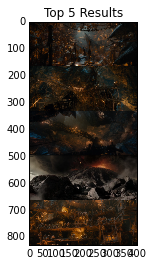

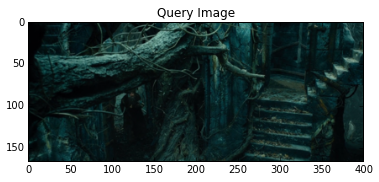

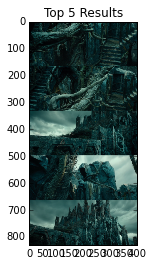

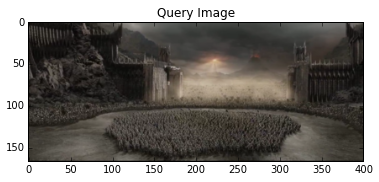

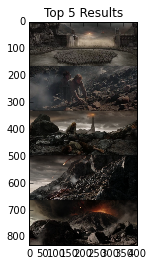

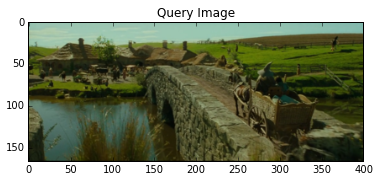

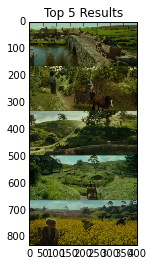

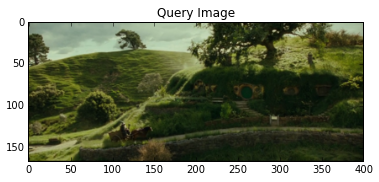

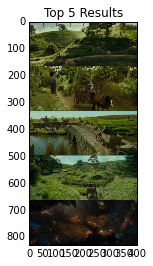

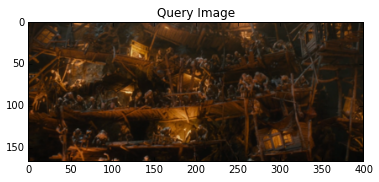

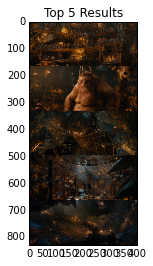

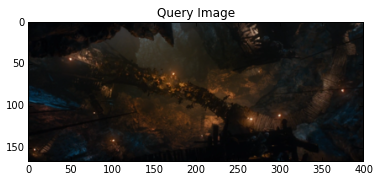

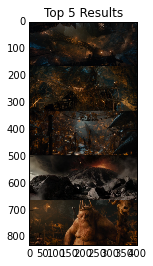

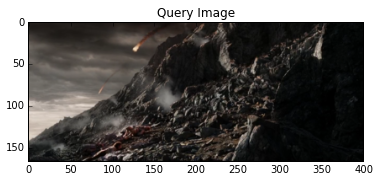

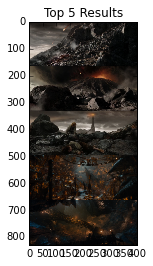

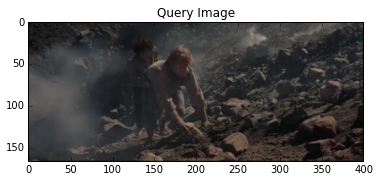

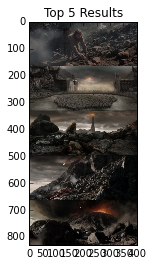

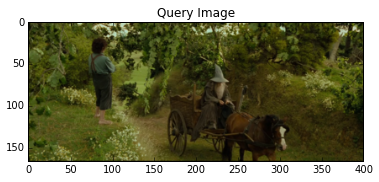

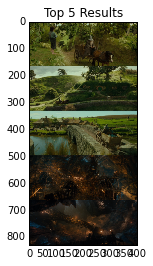

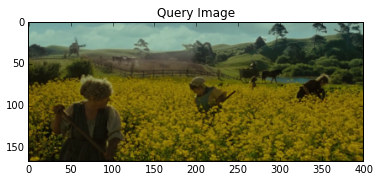

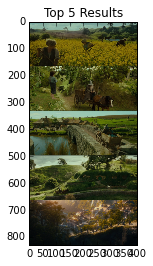

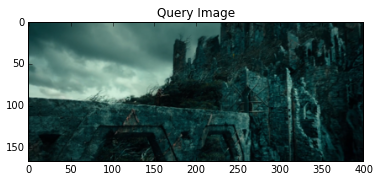

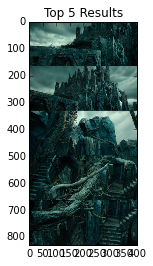

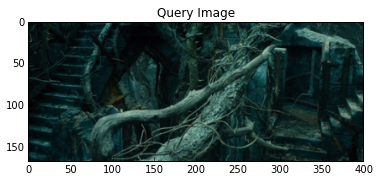

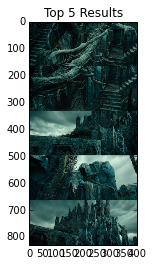

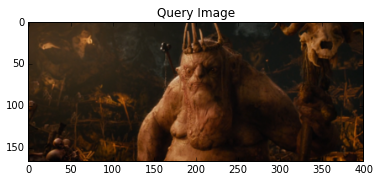

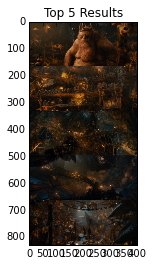

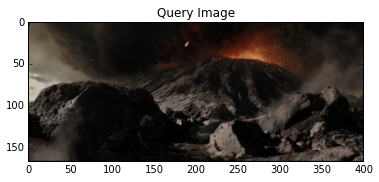

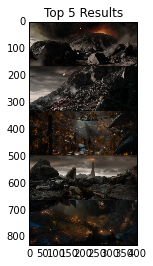

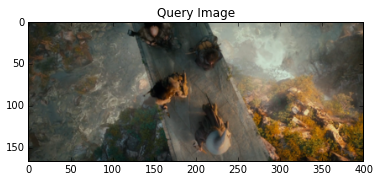

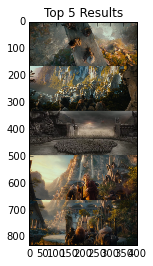

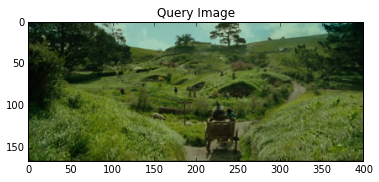

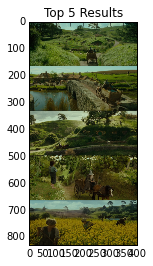

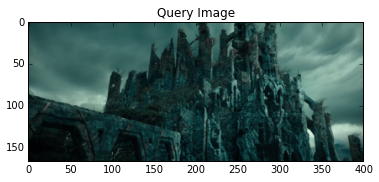

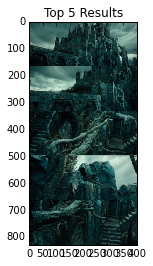

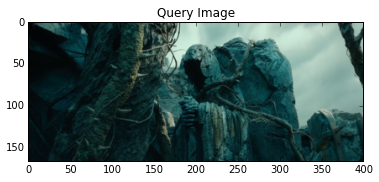

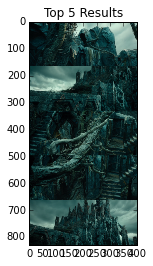

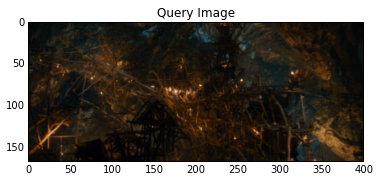

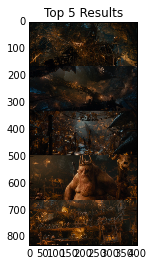

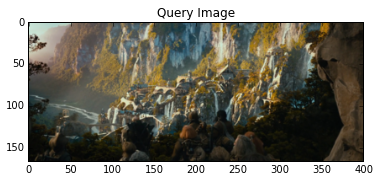

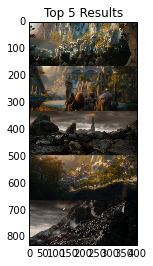

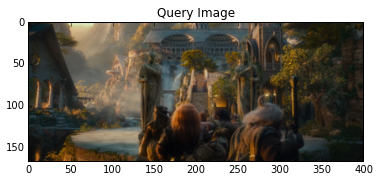

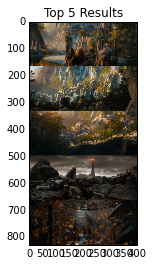

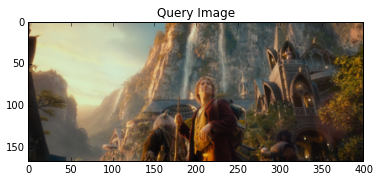

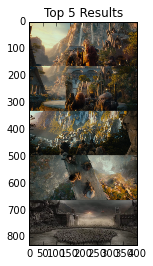

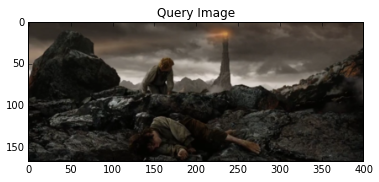

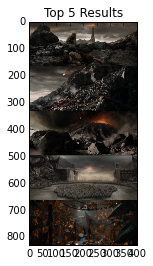

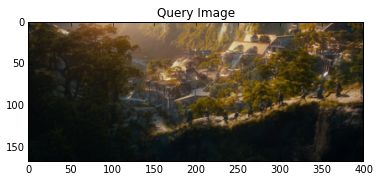

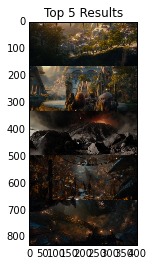

In [14]:
#import the necessary packages
%matplotlib inline
from Hobbit_Search import Searcher
import numpy as np
import argparse
import cPickle
import cv2
from matplotlib import pyplot as plt
import imutils

# construct argument parser and parse the arguments
# ap=argparse.ArgumentParser()
# ap.add_argument("-d","--dataset",required=True,help='Path to the dataset of indexed images')
# ap.add_argument("-i","--index",required=True,help='Path to where we stored the index')
# args=vars(ap.parse_args())

# Now we need to load the index and initialize the searcher
index=cPickle.loads(open("C:/Users/tsrivas/Documents/PythonScripts/images/Indexed/indexed").read())
searcher=Searcher(index)

# loop over all the images in the index and use each one
# as a query image. Note, the index is a dictionary.
for (query,queryFeatures) in index.items():
    results=searcher.search(queryFeatures)
    
    # load the query image and display it
    # path= args["dataset"] + '/%s' %(query)
    path="images" + "\%s" %(query)
    queryImage=cv2.imread(path)
    plt.figure(),plt.title("Query Image"),plt.imshow(imutils.opencv2matplotlib(queryImage)),plt.show()
    #print 'Query : %s' % query
    
    # initialize the montages to display the results
    # there are a total of 25 images that are indexed,
    # Display top 10 results; 5 images per montage
    montageA=np.zeros( (166*5,400,3),dtype='uint8')
    montageB=np.zeros( (166*5,400,3), dtype='uint8')
    
    # loop over the top 10 results
    for j in xrange(0,5):
        # grab the result and load the result image
        (score,imageName)=results[j]
        path="images"+"/%s" %(imageName)
        result=cv2.imread(path)
        #print '\t%d. %s : %.3f' %(j+1,imageName,score)
        
        # check to see if the first montage should be used
        if j<5:
            montageA[166*j:166*(j+1),:]=result
        # otherwise use the second montage
        else:
            montageB[166*(j-5):166*(j-5+1),:]=result
    
    # show the results
    plt.figure(),plt.title("Top 5 Results"),plt.imshow(imutils.opencv2matplotlib(montageA)),plt.show()
    #plt.imshow(imutils.opencv2matplotlib(montageB)),plt.show()
    #cv2.waitKey(0)